In [1]:
# Import semua library
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# Cek versi dari Tensorflow
print(tf.__version__)

2.2.0


In [3]:
# Download data from github
# https://github.com/DrGFreeman/rps-cv/archive/master.zip
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rps.zip


--2020-07-28 04:49:47--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rps.zip’

/tmp/rps.zip        100%[===================>] 307.92M  6.09MB/s    in 46s     

2020-07-28 04:50:34 (6.68 MB/s) - ‘/tmp/rps.zip’ saved [322873683/322873683]



In [4]:
# melakukan ekstraksi pada file zip
import zipfile,os
local_zip = '/tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [5]:
# lihat isi directory
os.listdir('/tmp/rockpaperscissors')

['README_rpc-cv-images.txt', 'rps-cv-images', 'rock', 'scissors', 'paper']

In [6]:
# Base directory
base_dir = '/tmp/rockpaperscissors'
# Direktori untuk setiap label
rock_dir = os.path.join(base_dir,'rock')
paper_dir = os.path.join(base_dir, 'paper')
scissors_dir = os.path.join(base_dir, 'scissors')
# Nama direktori untuk Train dan Validation
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'val')
# Buat direktori jika tidak ada
os.mkdir(train_dir)
os.mkdir(validation_dir)

In [7]:
# Lihat jumlah file pada masing-masing folder
print('Rock = {:n} images'.format(len(os.listdir(rock_dir))))
print('Paper = {:n} images'.format(len(os.listdir(paper_dir))))
print('Scissor = {:n} images'.format(len(os.listdir(scissors_dir))))

Rock = 726 images
Paper = 712 images
Scissor = 750 images


In [8]:
# Pecah dir semua dir jadi train (60%) dan validation (40%)
from sklearn.model_selection import train_test_split
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)

In [9]:
train_rock = os.path.join(train_dir, 'rock')
train_paper = os.path.join(train_dir, 'paper')
train_scissors = os.path.join(train_dir, 'scissors')
val_rock = os.path.join(validation_dir, 'rock')
val_paper = os.path.join(validation_dir, 'paper')
val_scissors = os.path.join(validation_dir, 'scissors')
# Direktori Train untuk setiap label
os.mkdir(train_rock)
os.mkdir(train_paper)
os.mkdir(train_scissors)
# Direktori Validation untuk setiap label
os.mkdir(val_rock)
os.mkdir(val_paper)
os.mkdir(val_scissors)

In [10]:
from shutil import copyfile
# Copy file ke directory train
for fileName in train_rock_dir:
  copyfile(os.path.join(rock_dir, fileName), os.path.join(train_rock, fileName))
print('Rock Train     : {:n} images'.format(len(os.listdir(train_rock))))
for fileName in train_paper_dir:
  copyfile(os.path.join(paper_dir, fileName), os.path.join(train_paper, fileName))
print('Paper Train    : {:n} images'.format(len(os.listdir(train_paper))))
for fileName in train_scissors_dir:
  copyfile(os.path.join(scissors_dir, fileName), os.path.join(train_scissors, fileName))
print('Scissors Train : {:n} images'.format(len(os.listdir(train_scissors))))
print('=====================================')
# Copy file ke direktory val
for fileName in val_rock_dir:
  copyfile(os.path.join(rock_dir, fileName), os.path.join(val_rock, fileName))
print('Rock Val       : {:n} images'.format(len(os.listdir(val_rock))))
for fileName in val_paper_dir:
  copyfile(os.path.join(paper_dir, fileName), os.path.join(val_paper, fileName))
print('Paper Val      : {:n} images'.format(len(os.listdir(val_paper))))
for fileName in val_scissors_dir:
  copyfile(os.path.join(scissors_dir, fileName), os.path.join(val_scissors, fileName))
print('Scissors Val   : {:n} images'.format(len(os.listdir(val_scissors))))
print('=====================================')
print('Total Train = {:n} images'.format(len(os.listdir(train_rock)) + len(os.listdir(train_paper)) + len(os.listdir(train_scissors))))
print('Total Val   = {:n} images'.format(len(os.listdir(val_rock)) + len(os.listdir(val_paper)) + len(os.listdir(val_scissors))))

Rock Train     : 435 images
Paper Train    : 427 images
Scissors Train : 450 images
Rock Val       : 291 images
Paper Val      : 285 images
Scissors Val   : 300 images
Total Train = 1312 images
Total Val   = 876 images


In [11]:
# Bikin image generator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [12]:
# Train Config
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16,
        # karena kita merupakan masalah klasifikasi banyak kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=16, # karena kita merupakan masalah klasifikasi banyak kelas maka menggunakan class_mode = 'categorical'
        class_mode='categorical')

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


In [13]:
# Model config
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [14]:
# Compile model
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [15]:
# Train model
status = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 22s - loss: 1.1420 - accuracy: 0.3675 - val_loss: 1.0863 - val_accuracy: 0.3500
Epoch 2/20
25/25 - 22s - loss: 0.9854 - accuracy: 0.4900 - val_loss: 0.7864 - val_accuracy: 0.6750
Epoch 3/20
25/25 - 22s - loss: 0.5978 - accuracy: 0.7800 - val_loss: 0.4488 - val_accuracy: 0.8000
Epoch 4/20
25/25 - 22s - loss: 0.4080 - accuracy: 0.8300 - val_loss: 0.3132 - val_accuracy: 0.8875
Epoch 5/20
25/25 - 22s - loss: 0.3650 - accuracy: 0.8500 - val_loss: 0.2475 - val_accuracy: 0.9125
Epoch 6/20
25/25 - 22s - loss: 0.2843 - accuracy: 0.8950 - val_loss: 0.2575 - val_accuracy: 0.9125
Epoch 7/20
25/25 - 22s - loss: 0.2645 - accuracy: 0.9125 - val_loss: 0.2318 - val_accuracy: 0.9250
Epoch 8/20
25/25 - 22s - loss: 0.2583 - accuracy: 0.9050 - val_loss: 0.3341 - val_accuracy: 0.8875
Epoch 9/20
25/25 - 22s - loss: 0.2119 - accuracy: 0.9325 - val_loss: 0.1557 - val_accuracy: 0.9625
Epoch 10/20
25/25 - 22s - loss: 0.2144 - accuracy: 0.9375 - val_loss: 0.2668 - val_accuracy: 0.9250
Epoch 11/

Using TensorFlow backend.


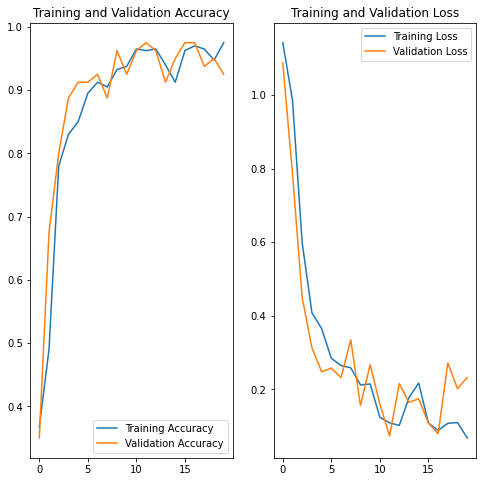

In [16]:
# Tampilkan hasil training: source : https://www.tensorflow.org/tutorials/images/classification
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 

acc = status.history['accuracy']
val_acc = status.history['val_accuracy']

loss = status.history['loss']
val_loss = status.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Saving zihL322yBqQvYvhE.png to zihL322yBqQvYvhE.png
zihL322yBqQvYvhE.png
[[0. 1. 0.]]
Prediksi =====> Rock


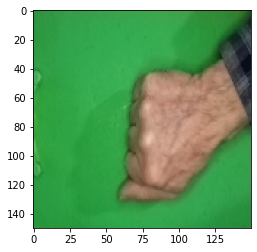

In [19]:
# Jalankan prediksi
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=16)
  
  print(fn)
  print(classes)
  if classes[0, 0]!=0:
    print('Prediksi =====> Paper')
  elif classes[0, 1]!=0:
    print('Prediksi =====> Rock')
  else:
    print('Prediksi =====> Scissors')